## eyes 전처리 시작

In [1]:
import pandas as pd

In [2]:
df_eyes=pd.read_csv('../../datasets/reviews_data/eyes.csv')

### 불용어 처리 및 한글자 살리기 및 단어 치환

#### 전처리 필요한 파일들 가져오기

In [3]:
# 불용어 
df_stop = pd.read_excel('../../datasets/dic/stopword_list.xlsx')
df_stop[-2:]

,stopword
1177,\r\n
1178,\n


#### 전처리 시작 
- 1. 형태소 분석 및 토큰화
- 2. 단어 치환
- 3. 불용어 처리

In [4]:
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# df_all['reveiw_replaced'] 열의 각 텍스트에 대해 중복 단어 제거 및 형태소 분석 수행
tokenized_reviews = []

# 필요한 품사 리스트 정의
desired_pos = ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Conjunction']

# 형태소 분석 결과를 담을 리스트 초기화
tokenized_reviews = []

for review_text in df_eyes['review_content']:
    try:
        # 형태소 분석 수행
        pos_result = okt.pos(review_text, norm=True, stem=True)
        
        # 필요한 조건을 만족하는 단어 선택
        filtered_tokens = []
        for word, pos in pos_result:
            if pos in desired_pos and len(word) > 1:
                filtered_tokens.append(word)
                    
        tokenized_reviews.append(filtered_tokens)  # 각 토큰을 개별 항목으로 유지
    except:
        pass

In [5]:
# 데이터프레임 df_all의 행 수 확인
df_all_shape = df_eyes.shape[0]

# tokenized_reviews 리스트의 길이 확인
tokenized_reviews_length = len(tokenized_reviews)

# 데이터프레임 df_all과 tokenized_reviews의 크기 비교
if df_all_shape == tokenized_reviews_length:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.")
else:
    print("데이터프레임 df_all과 tokenized_reviews의 크기가 일치하지 않습니다.")
    print(f"df_all의 행 수: {df_all_shape}")
    print(f"tokenized_reviews의 길이: {tokenized_reviews_length}")

데이터프레임 df_all과 tokenized_reviews의 크기가 일치합니다.


In [6]:
df_eyes['reveiw_replaced']=tokenized_reviews

In [7]:
# # 내용의 토큰화 먼저_healthapp 복사
# from mecab import MeCab
# mecab = MeCab()
# from konlpy.tag import Okt
# okt = Okt()
# stop=df_stop['stopword'].tolist()
# oneword=df_oneword['one_char_keyword'].tolist()

In [8]:
# 불용어 목록을 리스트로 변환
stop_list = df_stop['stopword'].tolist()

# 불용어 처리 함수 정의
def stopword(tokens):
    removed_tokens = [word for word in tokens if word not in stop_list]
    return ' '.join(removed_tokens)

In [9]:
# df_all['origin_reviews'] 열의 각 리스트에 불용어 처리 적용하고 쪼개기
df_eyes['replaced_review'] = df_eyes['reveiw_replaced'].apply(stopword)

In [10]:
df_eyes[:5]

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,replaced_review
0,0,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2023.06.02,먹어보니 좋고 몇번더 먹어봐야 알수 있을것 같아요,5.0,최*정,"[먹다, 보다, 좋다, 몇번, 먹다, 보다, 알다, 있다, 같다]",좋다 몇번 알다
1,1,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.11.15,꾸준하게 재구매 중입니다.\n처음엔 몰랐는데 효과가 있는거 같아요.\n눈이 많이 안...,5.0,정*섭,"[꾸준하다, 재다, 이다, 처음, 모르다, 효과, 있다, 같다, 많이, 안좋다, 녹...",꾸준하다 재다 모르다 안좋다 녹내장 통증 덜하다 좋다 피로하다
2,2,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.06.29,아직까지 효과를 느끼지는 못하겠어요.\n눈이 여러가지로 좋지 않아서 의무적으로 먹어...,5.0,정*섭,"[아직, 효과, 느끼다, 하다, 여러가지, 좋다, 않다, 의무, 먹다, 하다, 같다...",아직 느끼다 여러가지 좋다 의무 먹고다 유명하다 만들다 믿다 근데 가격 비싸다
3,3,"여에스더 루테인&지아잔틴 눈, 30정, 2개",2022.11.03,더 나빠지지않기위해 열심이먹고있어요 타사제품보다\n많이비쌉니다 가격을 더 조율해줄수...,4.0,최*옥,"[나빠지다, 않다, 위해, 열심, 먹다, 사제품, 많이, 비싸다, 가격, 조율, 해...",나빠지다 위해 열심 사제품 비싸다 가격 조율 해주다 좋다 제품 싸다
4,4,"여에스더 루테인&지아잔틴 눈, 30정, 4개",2023.08.11,잘 먹고 있습니다,5.0,황*자,"[자다, 먹다, 있다]",


In [14]:
# ' '이 포함된 레코드를 찾아서 제거
df_eyes = df_eyes[df_eyes['replaced_review'] != '']

In [18]:
df_eyes

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,replaced_review
0,0,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2023.06.02,먹어보니 좋고 몇번더 먹어봐야 알수 있을것 같아요,5.0,최*정,"[먹다, 보다, 좋다, 몇번, 먹다, 보다, 알다, 있다, 같다]",좋다 몇번 알다
1,1,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.11.15,꾸준하게 재구매 중입니다.\n처음엔 몰랐는데 효과가 있는거 같아요.\n눈이 많이 안...,5.0,정*섭,"[꾸준하다, 재다, 이다, 처음, 모르다, 효과, 있다, 같다, 많이, 안좋다, 녹...",꾸준하다 재다 모르다 안좋다 녹내장 통증 덜하다 좋다 피로하다
2,2,"여에스더 루테인&지아잔틴 눈, 30정, 1개",2022.06.29,아직까지 효과를 느끼지는 못하겠어요.\n눈이 여러가지로 좋지 않아서 의무적으로 먹어...,5.0,정*섭,"[아직, 효과, 느끼다, 하다, 여러가지, 좋다, 않다, 의무, 먹다, 하다, 같다...",아직 느끼다 여러가지 좋다 의무 먹고다 유명하다 만들다 믿다 근데 가격 비싸다
3,3,"여에스더 루테인&지아잔틴 눈, 30정, 2개",2022.11.03,더 나빠지지않기위해 열심이먹고있어요 타사제품보다\n많이비쌉니다 가격을 더 조율해줄수...,4.0,최*옥,"[나빠지다, 않다, 위해, 열심, 먹다, 사제품, 많이, 비싸다, 가격, 조율, 해...",나빠지다 위해 열심 사제품 비싸다 가격 조율 해주다 좋다 제품 싸다
5,5,뉴트리원 루테인 지아잔틴 164 정우성 눈건강 눈 보호 뻑뻑함 선명함 이물감 건조함...,2023.02.14,지인 추천으로 3개월 정도 눈 뻑뻑함이 덜 한것 같아요,4.0,심*옥,"[지인, 추천, 개월, 정도, 뻑뻑, 같다]",지인 추천 뻑뻑
...,...,...,...,...,...,...,...,...
65664,65664,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.10.28,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n굿,5.0,dnjs******,"[배송, 빨르다, 성능, 성능, 뛰어나다, 유통, 기한, 기한, 넉넉하다]",빨르다 뛰어나다
65665,65665,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.08.30,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\r\n그냥그래요,3.0,isil**,"[배송, 보통, 성능, 보통, 유통, 기한, 보통, 그냥, 그렇다]",그렇다
65666,65666,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.04.26,배송 빨라요 성능 성능이 뛰어나요,5.0,hiya***,"[배송, 빨르다, 성능, 성능, 뛰어나다]",빨르다 뛰어나다
65667,65667,정관장 알파프로젝트 눈건강 500mg*90캡슐,2020.03.10,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,k779************,"[배송, 빨르다, 성능, 성능, 뛰어나다, 유통, 기한, 기한, 넉넉하다]",빨르다 뛰어나다


### 토큰화 리뷰 빈도 계산

##### 형태소 빈도를 계산 

In [22]:
combined_text = df_eyes['replaced_review']

In [30]:
from collections import Counter
from wordcloud import WordCloud

In [32]:
combined_text = ' '.join(df_eyes['replaced_review'])

In [33]:
# 단어 빈도수 카운트
word_counts = Counter(combined_text.split())

In [34]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 단어 빈도수 딕셔너리를 WordCloud에 전달
wordcloud = WordCloud(font_path=font_path, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

In [35]:
wordcloud.words_

{'빨르다': 1.0,
 '좋다': 0.9466760005793463,
 '뛰어나다': 0.7846280113938107,
 '가격': 0.3348138849997586,
 '구매': 0.31596099068218025,
 '제품': 0.2605851397672959,
 '오메가': 0.2369526384396273,
 '상태': 0.19946410466856562,
 '꾸준하다': 0.17771447882972047,
 '사다': 0.17684545937334042,
 '깔끔하다': 0.169676048858205,
 '저렴하다': 0.16484816298942692,
 '복용': 0.15548206440399748,
 '건강': 0.14729879785641867,
 '싸다': 0.1402983633466905,
 '괜찮다': 0.1312460773427316,
 '구입': 0.11688311688311688,
 '주문': 0.11669000144836576,
 '루테': 0.08530874330130836,
 '믿다': 0.08156713175300535,
 '감사하다': 0.0797325351228697,
 '모르다': 0.07553227441703278,
 '항상': 0.07121131656447642,
 '종근당': 0.06954569593974798,
 '먹기': 0.06937671993434075,
 '재다': 0.06911118621155796,
 '만족하다': 0.06317288659296094,
 '상품': 0.06312460773427316,
 '아직': 0.060807222517259694,
 '루테인': 0.06005890020759909,
 '양제': 0.05795876985468063,
 '비타민': 0.056196591512576645,
 '편하다': 0.05474822575194323,
 '드리다': 0.052937768551151454,
 '섭취': 0.05165837879592526,
 '선물': 0.0500893158885

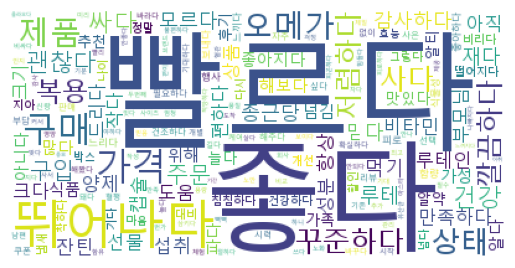

In [36]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

##### 문장을 합쳐서 계산할때 

In [37]:
# 단어로 쪼개기 
text_split = combined_text.split()

In [38]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'좋다': 39217,
         '몇번': 96,
         '알다': 1340,
         '꾸준하다': 7362,
         '재다': 2863,
         '모르다': 3129,
         '안좋다': 421,
         '녹내장': 42,
         '통증': 44,
         '덜하다': 425,
         '피로하다': 417,
         '아직': 2519,
         '느끼다': 859,
         '여러가지': 261,
         '의무': 10,
         '먹고다': 113,
         '유명하다': 181,
         '만들다': 226,
         '믿다': 3379,
         '근데': 353,
         '가격': 13870,
         '비싸다': 541,
         '나빠지다': 456,
         '위해': 1599,
         '열심': 22,
         '사제품': 87,
         '조율': 6,
         '해주다': 797,
         '제품': 10795,
         '싸다': 5812,
         '지인': 369,
         '추천': 1295,
         '뻑뻑': 502,
         '항상': 2950,
         '트리': 132,
         '건조하다': 848,
         '좋아지다': 1516,
         '감사하다': 3303,
         '느리다': 914,
         '기본': 156,
         '걸리다': 339,
         '달기': 5,
         '늦다': 327,
         '구성': 245,
         '성분': 1670,
         '루테': 3534,
         '지아': 1011,
         '잔틴': 1988,


In [39]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(combined_text)

In [40]:
# count 
wordCloud.words_ 

{'빨르다 뛰어나다': 1.0,
 '뛰어나다 빨르다': 0.251239328008813,
 '상태 깔끔하다': 0.22796750206554667,
 '좋다 빨르다': 0.20386945744973836,
 '깔끔하다 좋다': 0.17643211236573947,
 '싸다 사다': 0.13835720187276232,
 '좋다 좋다': 0.13309005783530709,
 '사다 빨르다': 0.12820159735610026,
 '가격 싸다': 0.12362296887909667,
 '가격 괜찮다': 0.10059212338198843,
 '좋다 상태': 0.09098733131368769,
 '좋다 가격': 0.07246626273753787,
 '뛰어나다 좋다': 0.07088267694849903,
 '구매 빨르다': 0.06527127513081796,
 '주문': 0.062310658220875795,
 '빨르다 가격': 0.05511567061415588,
 '양제': 0.0486780501239328,
 '좋다 제품': 0.04754199944918755,
 '가격 저렴하다': 0.046922335444781055,
 '빨르다 빨르다': 0.04606169099421647,
 '저렴하다 구매': 0.04568300743596805,
 '꾸준하다 복용': 0.04451253098320022,
 '빨르다 좋다': 0.04341090608647755,
 '괜찮다 빨르다': 0.04265353896998072,
 '감사하다 빨르다': 0.04134535940512256,
 '좋다 구매': 0.04055356651060314,
 '뛰어나다 오메가': 0.04055356651060314,
 '루테인': 0.04007160561828697,
 '제품 좋다': 0.03952079316992564,
 '먹기 편하다': 0.03525199669512531,
 '건강 위해': 0.03504544202698981,
 '저렴하다 가격': 0.034391352244560

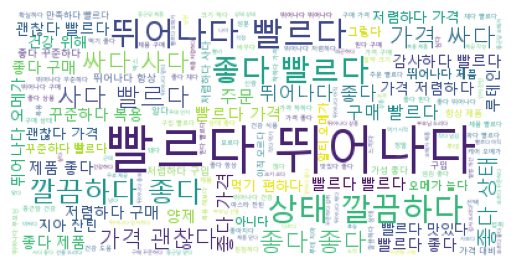

In [41]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()